# INF 5060/9060 
<div class="container">
      <div class="text">
        <h1> Quantitative Performance Analysis </h1>
      </div>
      <div class="image">
        <img src="https://upload.wikimedia.org/wikipedia/en/thumb/3/31/University_of_Oslo_seal.svg/1200px-University_of_Oslo_seal.svg.png" width=100>
      </div>
</div>

# Requirements/Dependencies
Intall these libraries if you haven't already installed them

In [140]:
# ! pip install numpy
# ! pip install scipy
# ! pip install matplotlib
# ! pip install seaborn

In [14]:
import numpy as np
from scipy.stats import binom, beta, uniform
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams.update({'font.size': 18})

In [15]:
## A simple probability class



class Probability:
    def __init__(self, n_outcomes=2):
        self.P = np.ones(n_outcomes) / n_outcomes
        self.n_outcomes = n_outcomes
            
    def get_prob(self, x):
        return self.P[x]

    def get_sample_space(self):
        return range(self.n_outcomes)

In [16]:
P = Probability(n_outcomes = 100)
for r in range(10):
    r = np.random.randint(100)
    print('sample:', r, ', probability:', P.get_prob(r))

sample: 28 , probability: 0.01
sample: 87 , probability: 0.01
sample: 72 , probability: 0.01
sample: 32 , probability: 0.01
sample: 96 , probability: 0.01
sample: 86 , probability: 0.01
sample: 62 , probability: 0.01
sample: 56 , probability: 0.01
sample: 41 , probability: 0.01
sample: 98 , probability: 0.01


### Binomial

Binom takes n and p as shape parameters, where p is the probability of a single success and n is the number of occurances.

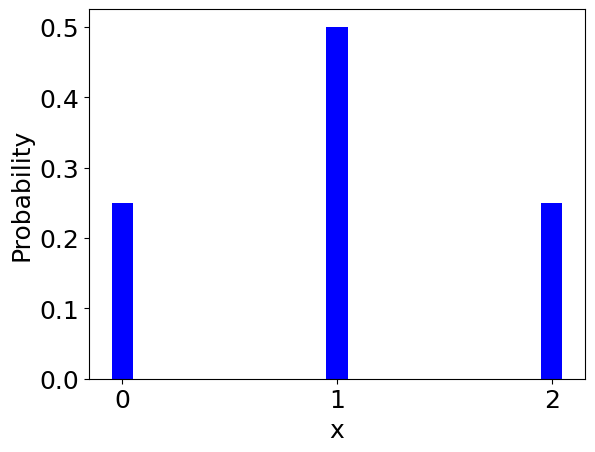

In [22]:
n = 2
p = 0.5
binom_dist = binom(n, p)
x = np.arange(n+1)

plt.bar(x, binom_dist.pmf(x), color='b', width=0.1)
plt.ylabel('Probability')
plt.xlabel('x')
plt.xticks(x)
plt.show()

## Histogram

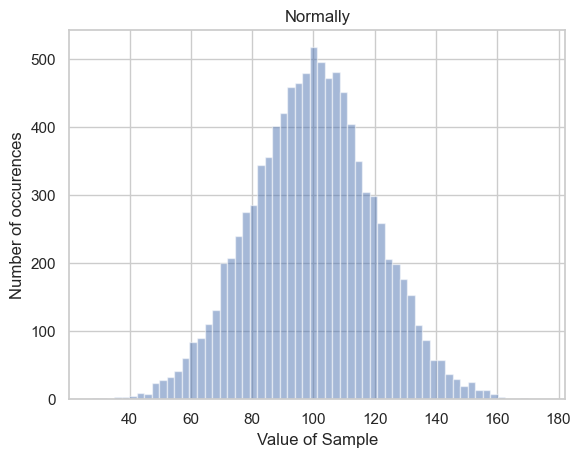

pdf of x is 1.0


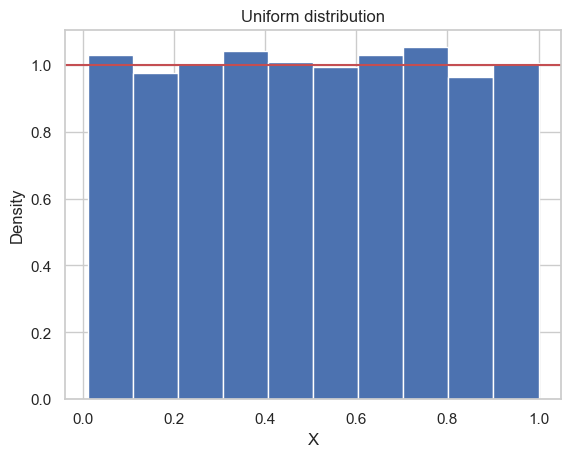

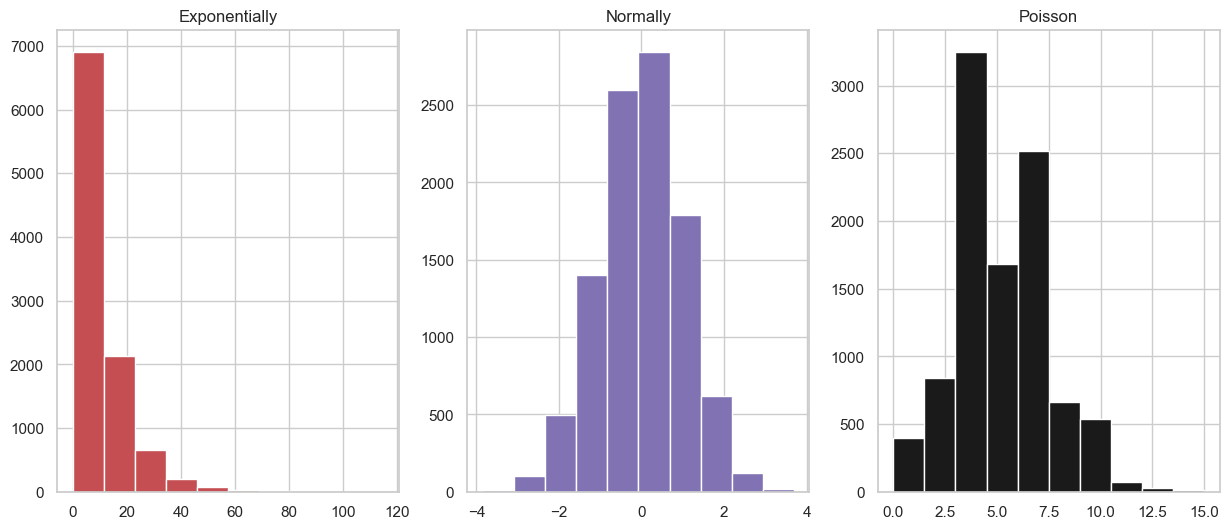

In [37]:
fig, ax = plt.subplots(1, 1)

r = norm.rvs(size=10000, loc=100, scale = 20)

ax.hist(r, bins='auto', histtype='bar', alpha=0.5)
ax.set_title("Normally")

plt.ylabel('Number of occurences')
plt.xlabel('Value of Sample')
plt.show()



sns.set(style="whitegrid")
np.random.seed(10)

fig, axs=plt.subplots(1, 3, figsize=(15, 6))

axs[0].hist(np.random.exponential(scale = 10, size = 10000), color = "r")
axs[0].set_title("Exponentially")

axs[1].hist(np.random.randn(10000), color = "m") 
axs[1].set_title("Normally")

axs[2].hist(np.random.poisson(lam = 5, size = 10000), color = "k")
axs[2].set_title("Poisson")


plt.show()

## uniform and normal distributions

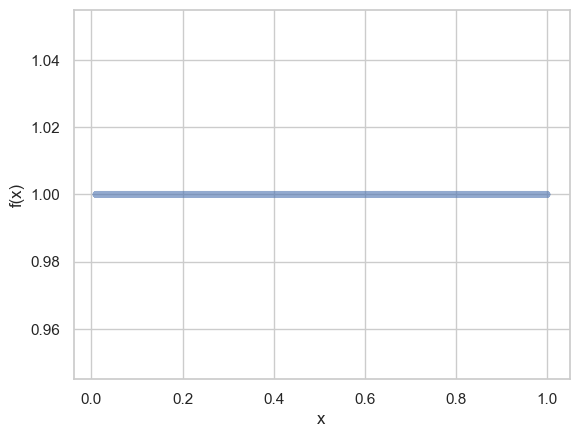

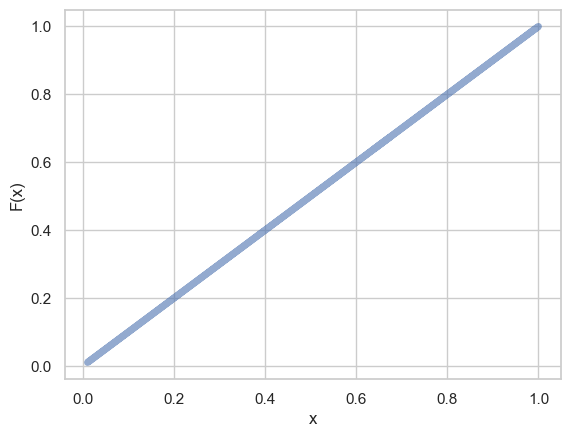

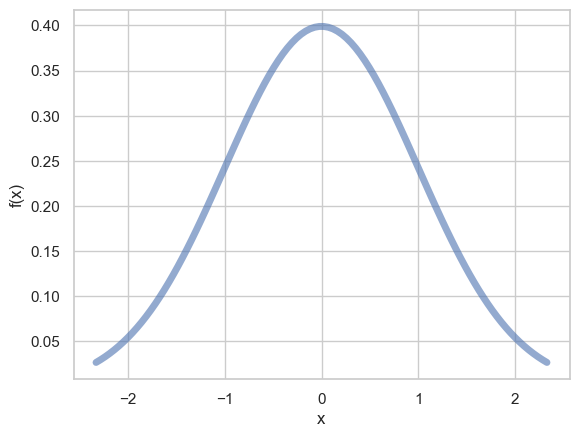

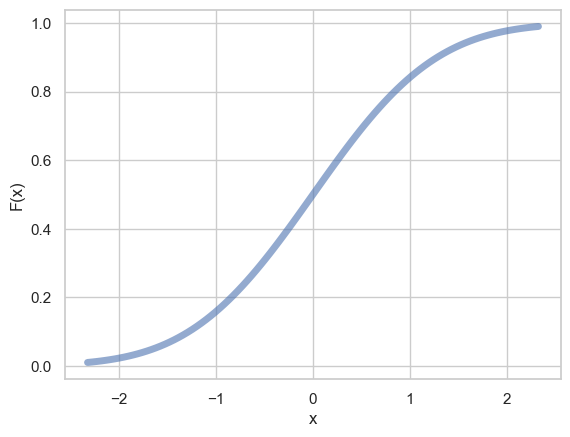

In [44]:
from scipy.stats import norm, uniform


x = uniform.rvs(0.01,0.99,size=10000)

# Probability Density Function

plt.plot(x, uniform.pdf(x),
       'b-', lw=5, alpha=0.6, label='uniform pdf')

plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()


# Cumulative Distribution Function

plt.plot(x, uniform.cdf(x),
       'b-', lw=5, alpha=0.6, label='uniform cdf')

plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

#linspace returns evenly spaced numbers over a specified interval
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100) 
#print(x)

# Probability Density Function


plt.plot(x, norm.pdf(x),
       'b-', lw=5, alpha=0.6, label='norm pdf')

plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()


# Cumulative Distribution Function

fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.cdf(x),'b-', lw=5, alpha=0.6, label='norm cdf')
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()




Text(0.5, 0, 'x')

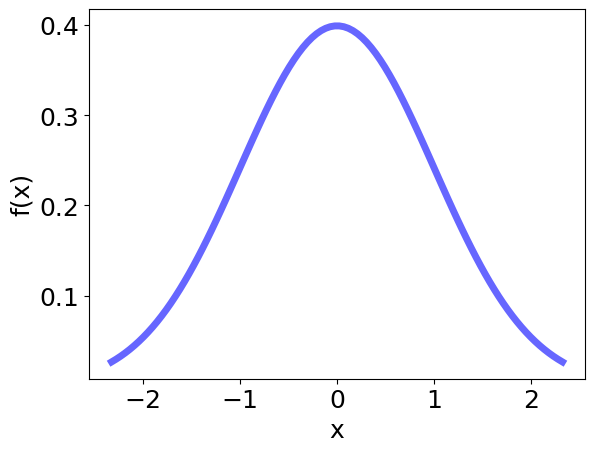

## Indices of Central Tendency


### mean

In [45]:
# mean
fig, ax = plt.subplots(1, 1)

#The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.
r = norm.rvs(size=1000000, loc=100, scale = 10)

ax.hist(r, bins='auto', histtype='bar', alpha=0.3)
r_mean = np.mean(r)
print('mean: ', r_mean)
plt.vlines(r_mean, 0, 11000,  color= 'r', ls='--')

plt.ylabel('Number of occurences')
plt.xlabel('Value of Sample')
plt.show()

mean:  99.99818016614081


In [53]:
# skewed normal distribution

from scipy.stats import skewnorm

#rvs(a, loc=0, scale=1, size=1, random_state=None)
#skewnorm takes a real number 'a' as a skewness parameter When a = 0 the distribution is identical to a normal distribution

r_sk = skewnorm.rvs(10, size=1000000, loc=130, scale = 10)

Text(0.5, 0, 'Value of Sample')

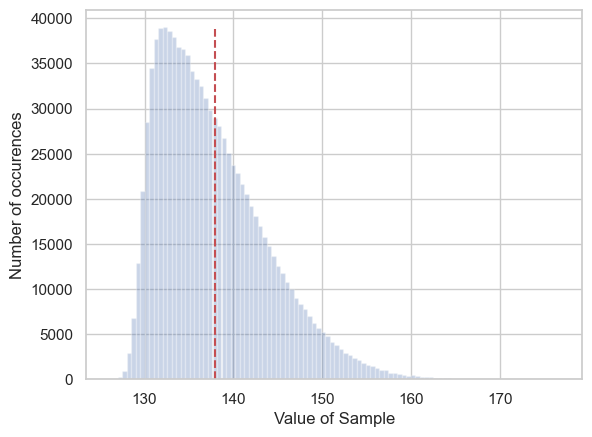

In [54]:
fig, ax = plt.subplots(1, 1)

heights,bins = np.histogram(r_sk,bins=100)
plt.bar(bins[:-1],heights,width=(max(bins) - min(bins))/len(bins), alpha=0.3)

r_sk_mean = np.mean(r_sk)
plt.vlines(r_sk_mean, 0, heights.max(), color= 'r', ls='--')
plt.ylabel('Number of occurences')
plt.xlabel('Value of Sample')

### median

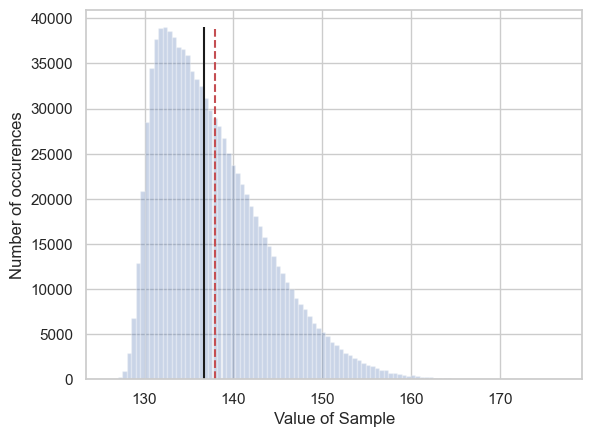

In [55]:
# median

plt.bar(bins[:-1],heights,width=(max(bins) - min(bins))/len(bins), alpha=0.3)

r_sk_median = np.median(r_sk)
plt.vlines(r_sk_mean, 0, heights.max(),  color= 'r', ls='--')
plt.vlines(r_sk_median, 0, heights.max(),  color= 'k', ls='-')
plt.ylabel('Number of occurences')
plt.xlabel('Value of Sample')
plt.show()

### mode

In [56]:
mode_index = heights.argmax()
r_sk_mode = bins[mode_index]
print('mode is %.3f' % r_sk_mode)

mode is 132.319


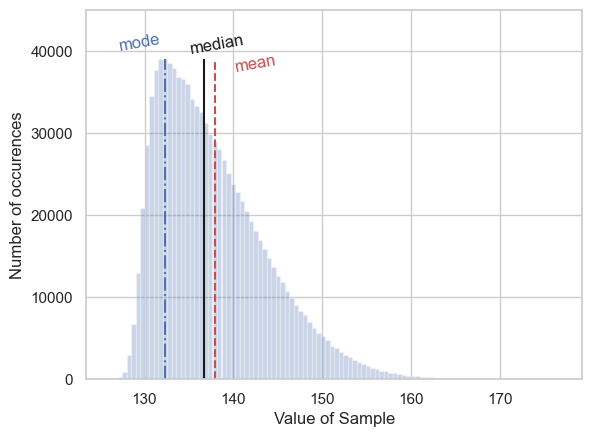

In [57]:
plt.bar(bins[:-1], heights, width=(max(bins) - min(bins))/len(bins), alpha=0.3)


plt.vlines(r_sk_mean, 0, heights.max(),  color= 'r', ls='--')
plt.vlines(r_sk_median, 0, heights.max(),  color= 'k', ls='-')
plt.vlines(r_sk_mode, 0, heights.max(),  color= 'b', ls='-.')

plt.text(140, heights.max() - 1500, 'mean', color='r', rotation = 10)
plt.text(135, heights.max() + 700, 'median', color='k', rotation = 10)
plt.text(127, heights.max() + 1000, 'mode', color='b', rotation = 10)

plt.ylabel('Number of occurences')
plt.xlabel('Value of Sample')
plt.ylim(0, heights.max() + 6000)
plt.show()

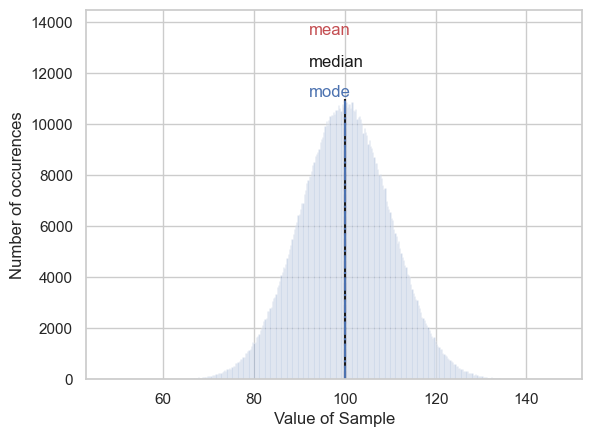

In [58]:
r_hist = plt.hist(r, bins='auto', histtype='bar', alpha=0.3)

r_max_height = 11000

r_median = np.median(r)

# mode
r_heights = r_hist[0]
r_bins = r_hist[1]
r_mode = r_bins[r_heights.argmax()]

plt.vlines(r_mean, 0, r_max_height,  color= 'r', ls='--')
plt.vlines(r_median, 0, r_max_height,  color= 'k', ls='-')
plt.vlines(r_mode, 0, r_max_height,  color= 'b', ls='-.')

plt.text(r_mean - 8, r_max_height + 2500, 'mean', color='r')
plt.text(r_mean - 8, r_max_height + 1250, 'median', color='k')
plt.text(r_mean - 8, r_max_height+ 100, 'mode', color='b')

plt.ylabel('Number of occurences')
plt.xlabel('Value of Sample')
plt.ylim(0, r_max_height + 3500)
plt.show()

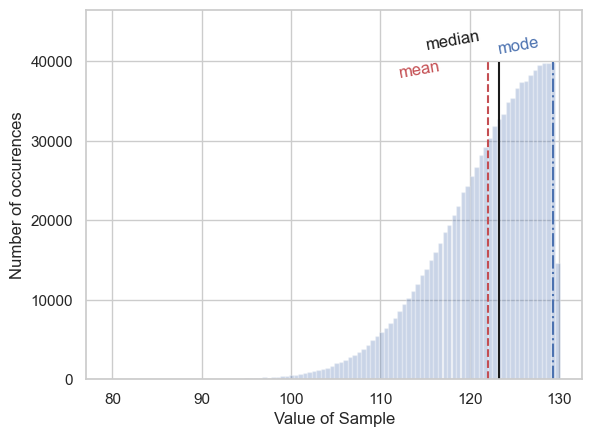

In [59]:
r_lsk = skewnorm.rvs(-100, size=1000000, loc=130, scale = 10)


lsk_heights, lsk_bins = np.histogram(r_lsk,bins=100)
plt.bar(lsk_bins[:-1],lsk_heights, width=(max(lsk_bins) - min(lsk_bins))/len(lsk_bins), alpha=0.3)

r_lsk_mean = np.mean(r_lsk)
r_lsk_median = np.median(r_lsk)

r_lsk_mode = lsk_bins[lsk_heights.argmax()]

plt.vlines(r_lsk_mean, 0, lsk_heights.max(),  color= 'r', ls='--')
plt.vlines(r_lsk_median, 0, lsk_heights.max(),  color= 'k', ls='-')
plt.vlines(r_lsk_mode, 0, lsk_heights.max(),  color= 'b', ls='-.')

plt.text(112, lsk_heights.max() - 2000, 'mean', color='r', rotation = 10)
plt.text(115, lsk_heights.max() + 1500, 'median', color='k', rotation = 10)
plt.text(123, lsk_heights.max() + 1000, 'mode', color='b', rotation = 10)



plt.ylabel('Number of occurences')
plt.xlabel('Value of Sample')
plt.ylim(0, heights.max() + 7500)
plt.show()

In [60]:
r2 = norm.rvs(size=1000000, loc=190, scale = 10)
bimodal_r = np.append(r, r2)

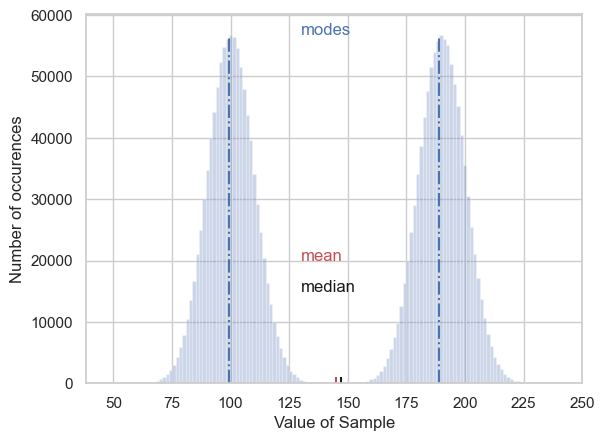

In [61]:
rb_hist = plt.hist(bimodal_r, bins='auto', histtype='bar', alpha=0.3)

rb_mean = np.mean(bimodal_r)
rb_median = np.median(bimodal_r)

# mode
rb_heights = rb_hist[0]
rb_bins = rb_hist[1]
rb_mode = rb_bins[rb_heights.argmax()]
rb_mode2 = rb_bins[np.argsort(rb_heights)[-2]]



rb_max_height = rb_heights.max()

plt.vlines(rb_mean, 0, 1000,  color= 'r', ls='--')
plt.vlines(rb_median, 0, 1000,  color= 'k', ls='-')
plt.vlines(rb_mode, 0, rb_max_height,  color= 'b', ls='-.')
plt.vlines(rb_mode2, 0, rb_max_height,  color= 'b', ls='-.')

plt.text(rb_mean - 15, 20000, 'mean', color='r')
plt.text(rb_mean - 15, 15000, 'median', color='k')
plt.text(rb_mean - 15, rb_max_height+ 100, 'modes', color='b')


plt.ylabel('Number of occurences')
plt.xlabel('Value of Sample')
plt.ylim(0, rb_max_height + 3500)
plt.show()

### geometric mean

In [62]:
from scipy.stats import gmean

gmean([1.18, 1.13, 1.11, 1.08, 1.1, 1.28, 1.05]) - 1

0.13072506625797775

## Indices of Dispersion

[33.4514179  43.2740947  49.97405024 56.71080888 66.42708213]


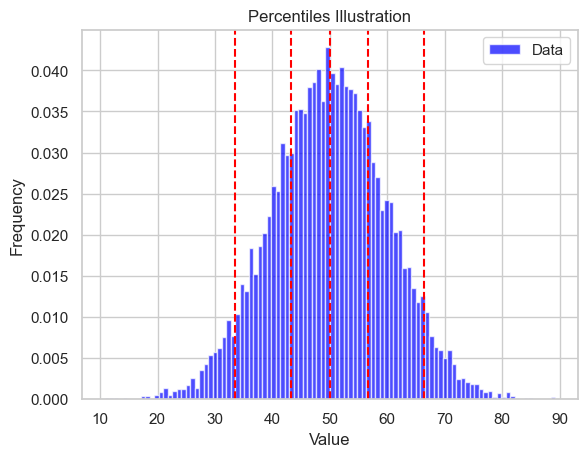

In [86]:
# Generate some example data
np.random.seed(42)


data = np.random.normal(loc=50, scale=10, size=10000)
#data = skewnorm.rvs(100, size=10000, loc=50, scale = 10)

# Define percentiles
percentiles = [5, 25, 50, 75, 95]

# Calculate percentiles
percentile_values = np.percentile(data, percentiles)
print(percentile_values)

# Create a histogram
plt.hist(data, bins=100, density=True, alpha=0.7, color='blue', label='Data')

# Plot vertical lines at the percentiles
for percentile in percentile_values:
    plt.axvline(x=percentile, color='red', linestyle='--')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Percentiles Illustration')
plt.legend()
plt.grid(True)
plt.show()

### range

In [63]:
range = np.max(r) - np.min(r)
print('range: %.2f' % range)

range: 99.25


### variance

In [64]:
np.var(r)

99.94666782686112

### standard deviation

In [65]:
np.std(r)

9.99733303570813

### Coefficient of Variation (C.O.V. )

In [161]:
cv = np.std(r) / np.mean(r)
print('Coefficient of Variation: %.2f' % cv)

Coefficient of Variation: 0.10


### Mean Absolute Deviation

In [162]:
def mad(x):
    return np.mean(np.absolute(x - np.mean(x)))

In [163]:
print('Mean Absolute Deviation: %.2f' % mad(r))

Mean Absolute Deviation: 7.96


### percentiles

<img src='https://online-learning-college.com/wp-content/uploads/2022/04/Interquartile-range-scaled.jpg'>

In [164]:
r_p10 = np.percentile(r, 10)
r_p90 = np.percentile(r, 90)

print('10- and 90-percentile: %.2f, %.2f' % (r_p10, r_p90))

r_Q1 = np.percentile(r, 25)
r_Q2 = np.percentile(r, 50)
r_Q3 = np.percentile(r, 75)

print('(Semi-)interquartile range (SIQR): %.2f' % ((r_Q3 - r_Q1) / 2))

r_q50 = np.quantile(r, 0.5)

print()
print('median: The 50-percentile: %.2f, or .5-quantile: %.2f' % (r_Q2, r_q50))

10- and 90-percentile: 87.19, 112.78
(Semi-)interquartile range (SIQR): 6.73

median: The 50-percentile: 99.99, or .5-quantile: 99.99


Text(0.5, 0, 'x')

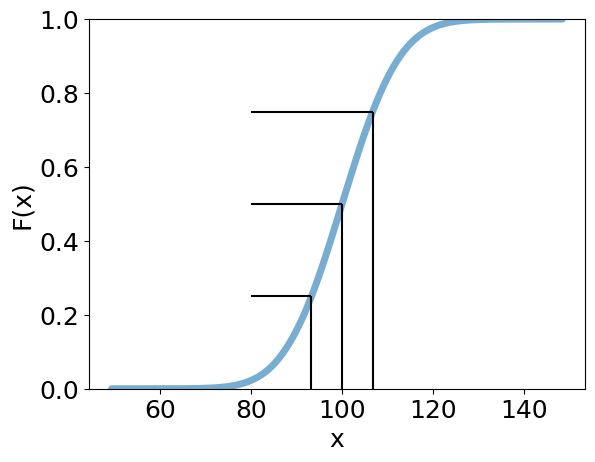

In [165]:
# Cumulative Distribution Function

sns.ecdfplot(r, lw=5, alpha=0.6)


plt.hlines(0.5, 80, r_median,  color= 'k', ls='-')
plt.vlines(r_median, 0, 0.5,  color= 'k', ls='-')

plt.hlines(0.25, 80, r_Q1,  color= 'k', ls='-')
plt.vlines(r_Q1, 0, 0.25,  color= 'k', ls='-')

plt.hlines(0.75, 80, r_Q3,  color= 'k', ls='-')
plt.vlines(r_Q3, 0, 0.75,  color= 'k', ls='-')

plt.ylabel('F(x)')
plt.xlabel('x')

### PDF and CDF of Normal Distribution

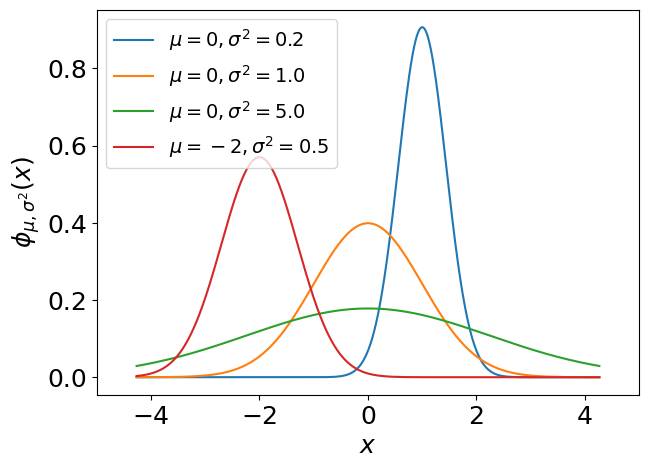

In [166]:
# The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

ax = plt.figure(figsize=(7, 5))

x = np.linspace(norm.ppf(0.00001),
                norm.ppf(0.99999), 1000)

plt.plot(x, norm.pdf(x, loc=1, scale = 0.44), label = '$\mu=0, \sigma^{2}=0.2$')
plt.plot(x, norm.pdf(x, loc=0, scale = 1), label = '$\mu= 0, \sigma^{2}=1.0$')
plt.plot(x, norm.pdf(x, loc=0, scale = 2.24), label = '$\mu=0, \sigma^{2}=5.0$')
plt.plot(x, norm.pdf(x, loc=-2, scale = 0.7), label = '$\mu=-2, \sigma^{2}=0.5$')
plt.xlim(-5, 5)
plt.xlabel('$x$')
plt.ylabel('$\phi_{\mu,\sigma^{2}}(x)$')
plt.legend(fontsize=14)
plt.show()

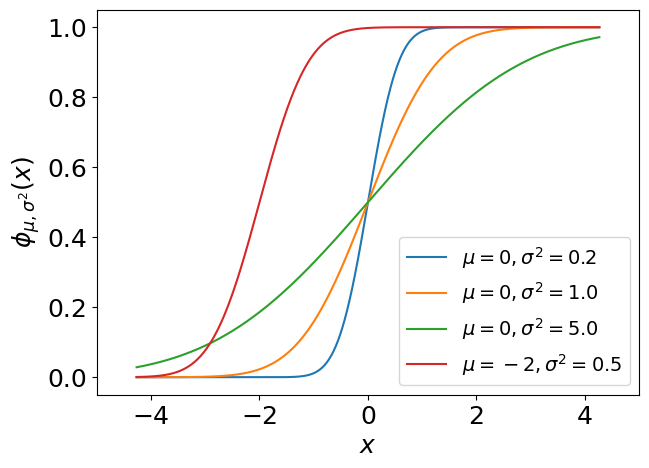

In [167]:
# The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

ax = plt.figure(figsize=(7, 5))

x = np.linspace(norm.ppf(0.00001),
                norm.ppf(0.99999), 1000)

plt.plot(x, norm.cdf(x, loc=0, scale = 0.44), label = '$\mu=0, \sigma^{2}=0.2$')
plt.plot(x, norm.cdf(x, loc=0, scale = 1), label = '$\mu= 0, \sigma^{2}=1.0$')
plt.plot(x, norm.cdf(x, loc=0, scale = 2.24), label = '$\mu=0, \sigma^{2}=5.0$')
plt.plot(x, norm.cdf(x, loc=-2, scale = 0.7), label = '$\mu=-2, \sigma^{2}=0.5$')
plt.xlim(-5, 5)
plt.xlabel('$x$')
plt.ylabel('$\phi_{\mu,\sigma^{2}}(x)$')
plt.legend(fontsize=14)
plt.show()

# Comparing Systems

### Confidence Interval

In [168]:
from scipy import stats

def mean_confidence_interval(data, confidence=0.95):
    return stats.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=stats.sem(data))

In [169]:
r3 = norm.rvs(size=1000, loc=0, scale = 1)

r_ci = mean_confidence_interval(r3)

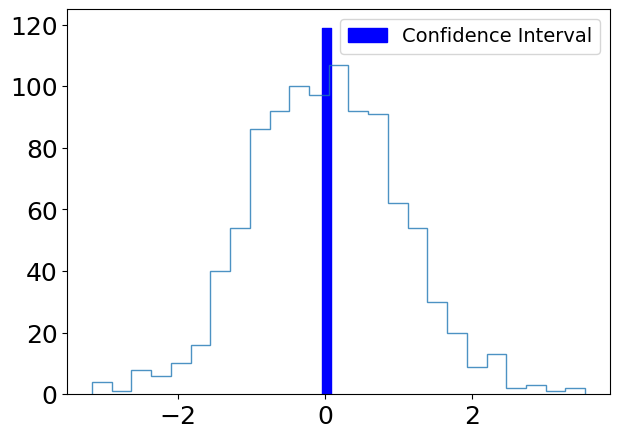

In [34]:
plt.figure(figsize=(7, 5))
plt.hist(r3, bins='auto', histtype='step', alpha=0.8)

# plt.vlines(r_ci[0], 0, r_max_height)
# plt.vlines(r_ci[1], 0, r_max_height)
plt.fill_betweenx(np.arange(0,120), x1=r_ci[0], x2=r_ci[1], color='b', label='Confidence Interval')
plt.legend(loc='upper right', fontsize=14)
